In [37]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv("GEMINI_API_KEY")

In [38]:
from typing import Annotated
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chat_models import init_chat_model
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# llm = init_chat_model("anthropic:claude-3-5-sonnet-latest")

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

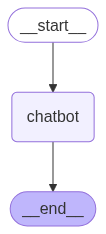

In [39]:
graph

In [41]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        print("User: " + user_input)
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: Hello
Assistant: Hello! How can I help you today?

User: Buy me a car worth 25K
Assistant: Okay, I can help you explore some options for cars around the $25,000 price point.  To give you the best recommendations, I need a little more information about what you're looking for.  Consider these questions:

**1. New, Used, or Certified Pre-Owned (CPO)?**

*   **New:** You'll get the latest features, a full warranty, and the peace of mind of being the first owner. However, your options will be more limited at this price point.
*   **Used:** You'll get more car for your money, but you'll need to do more research on the car's history and condition.
*   **CPO:** A good middle ground. These are used cars that have been inspected and reconditioned by the manufacturer or dealership and come with an extended warranty.

**2. What type of car are you looking for?**

*   **Sedan:** Practical, fuel-efficient, and good for everyday driving.
*   **Hatchback:** Similar to a sedan but with a rear ha

In [43]:
import google.generativeai as genai

# Authenticate your API key (replace with your actual API key or set as environment variable)
# genai.configure(api_key="YOUR_API_KEY") 

# List all available models
for model in genai.list_models():
    # Filter for models that support content generation (e.g., text generation)
    print(model.name, model.supported_generation_methods)
    # if 'generateContent' in model.supported_generation_methods:
    #     print(model.name)

models/embedding-gecko-001 ['embedText', 'countTextTokens']
models/gemini-1.0-pro-vision-latest ['generateContent', 'countTokens']
models/gemini-pro-vision ['generateContent', 'countTokens']
models/gemini-1.5-pro-latest ['generateContent', 'countTokens']
models/gemini-1.5-pro-002 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro ['generateContent', 'countTokens']
models/gemini-1.5-flash-latest ['generateContent', 'countTokens']
models/gemini-1.5-flash ['generateContent', 'countTokens']
models/gemini-1.5-flash-002 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-flash-8b ['createCachedContent', 'generateContent', 'countTokens']
models/gemini-1.5-flash-8b-001 ['createCachedContent', 'generateContent', 'countTokens']
models/gemini-1.5-flash-8b-latest ['createCachedContent', 'generateContent', 'countTokens']
models/gemini-2.5-pro-preview-03-25 ['generateContent', 'countTokens', 'createCachedContent', 'batchGenerateContent']
models/ge

In [33]:
import os
from dotenv import load_dotenv

load_dotenv(0)

COHERE_API_KEY = os.getenv("COHERE_API_KEY")

In [ ]:
# from langchain_cohere import ChatCohere
# from langchain_core.messages import HumanMessage
# llm = ChatCohere(
#     cohere_api_key=COHERE_API_KEY, model="command-a-03-2025"
# )
# # Send a chat message without chat history
# current_message = [HumanMessage(content="knock knock")]
# print(llm.invoke(current_message))

PydanticUserError: The `__modify_schema__` method is not supported in Pydantic v2. Use `__get_pydantic_json_schema__` instead in class `SecretStr`.

For further information visit https://errors.pydantic.dev/2.11/u/custom-json-schema

In [36]:
from langchain_cohere.llms import Cohere

llm = Cohere()
print(llm.invoke("Come up with a pet name"))

PydanticUserError: The `__modify_schema__` method is not supported in Pydantic v2. Use `__get_pydantic_json_schema__` instead in class `SecretStr`.

For further information visit https://errors.pydantic.dev/2.11/u/custom-json-schema

In [34]:
from langchain_cohere import ChatCohere, CohereEmbeddings
from langchain_core.messages import HumanMessage
chat = ChatCohere(cohere_api_key=COHERE_API_KEY, model="command-a-03-2025")
messages = [HumanMessage(content="Knock Knock")]
print(chat.invoke(messages))

PydanticUserError: The `__modify_schema__` method is not supported in Pydantic v2. Use `__get_pydantic_json_schema__` instead in class `SecretStr`.

For further information visit https://errors.pydantic.dev/2.11/u/custom-json-schema

In [20]:
import os
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from dotenv import load_dotenv

load_dotenv()
model_name = "medgemma-4b-it"
emb_model_name = "nomic-embed-text-v1.5"
llm = ChatOpenAI(
    base_url="http://localhost:1234/v1",
    model=model_name,
    api_key="lm-studio"
)

In [21]:
from typing import List
import requests
from langchain.embeddings.base import Embeddings
class NomicEmbeddings(Embeddings):
    def __init__(self, model_name:str, base_url:str="http://localhost:1234/v1", api_key:str="lm-studio"):
        self.model_name = model_name
        self.base_url = base_url
        self.api_key = api_key
    
    def embed_documents(self, texts: List[str]) -> List[List[float]]:
        return [self.embed_query(text) for text in texts]
    
    def embed_query(self, text: str) -> List[float]:
        url = f"{self.base_url}/embeddings"
        headers = {
            "Authorization": f"Bearer {self.api_key}",
            "Content-type": "application/json"
        }
        payload = {
            "model": self.model_name,
            "input": text
        }

        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()
        return response.json()['data'][0]['embedding']
    
embeddings = NomicEmbeddings(model_name="nomic-embed-text-v1.5")

In [27]:
from langchain.document_loaders import JSONLoader
loader = JSONLoader(file_path="./vehicles.json", jq_schema=".[]", text_content=False)
# loader = JSONLoader(
#     file_path="vehicles.json",
#     jq_schema=".messages[].content",
#     text_content=False,
# )

In [28]:
docs = loader.load()
docs

[Document(metadata={'source': 'C:\\sharath\\Github\\Projects\\Loan prediction\\loan-pred\\assessments\\Pinnacle Intelligence\\codes\\simulator\\vehicles.json', 'seq_num': 1}, page_content='{"id": "CDE001", "make": "Cadillac", "model": "Escalade IQ", "year": 2025, "trim": "AWD Luxury 1", "price": "115495$", "msrp": 120000, "discount": 4505, "mileage": 0, "condition": "new", "fuel_type": "Electric", "transmission": "Automatic", "body_style": "SUV", "dealer": "Fremont Cadillac", "location": "Fremont, CA", "vin": "1GYS4RKT0RR123456", "stock_number": "FREM001", "image_url": "https://example.com/images/escalade.jpg"}'),
 Document(metadata={'source': 'C:\\sharath\\Github\\Projects\\Loan prediction\\loan-pred\\assessments\\Pinnacle Intelligence\\codes\\simulator\\vehicles.json', 'seq_num': 2}, page_content='{"id": "ACE002", "make": "Acura", "model": "Integra", "year": 2025, "trim": "A-Spec Tech Package", "price": "36995$", "msrp": 38995, "discount": 2000, "mileage": 10, "condition": "new", "fu

In [29]:
vectorstore = FAISS.from_documents(docs, embeddings)

In [30]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 2}),
    return_source_documents=True
)
qa_chain

RetrievalQA(verbose=False, combine_documents_chain=StuffDocumentsChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="Use the following pieces of context to answer the user's question. \nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n----------------\n{context}"), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})]), llm=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002A6B28A1D60>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002A6B280C200>, root_client=<openai.OpenAI object at

In [31]:
user_input = "I want a car under $25K but don’t know what brand"
qa_chain.invoke(user_input)

{'query': 'I want a car under $25K but don’t know what brand',
 'result': 'Based on the provided data, there is one Acura Integra available for under $25,000 (the 2025 Acura Integra A-Spec Tech Package).\n',
 'source_documents': [Document(id='c689eadf-be7d-4dfa-9128-ec992edb1534', metadata={'source': 'C:\\sharath\\Github\\Projects\\Loan prediction\\loan-pred\\assessments\\Pinnacle Intelligence\\codes\\simulator\\vehicles.json', 'seq_num': 2}, page_content='{"id": "ACE002", "make": "Acura", "model": "Integra", "year": 2025, "trim": "A-Spec Tech Package", "price": "36995$", "msrp": 38995, "discount": 2000, "mileage": 10, "condition": "new", "fuel_type": "Gasoline", "transmission": "CVT", "body_style": "Sedan", "dealer": "Concord Acura", "location": "Concord, CA", "vin": "19UDE4H63SA018560", "stock_number": "CONC002", "image_url": "https://example.com/images/integra.jpg"}'),
  Document(id='6898a64e-4783-4785-8368-39bdaf5219d2', metadata={'source': 'C:\\sharath\\Github\\Projects\\Loan pred

In [24]:
while True:
    user_input = input("Ask about cars: ")
    if user_input.lower() in ["exit", "quit"]:
        break
    answer = qa_chain.run(user_input)
    print("Bot:", answer)


C:\Users\shash\AppData\Local\Temp\ipykernel_22692\2780918191.py:5: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = qa_chain.run(user_input)


ValueError: `run` not supported when there is not exactly one output key. Got ['result', 'source_documents'].